## Visualize Training Progress with TensorBoard in PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
%load_ext tensorboard

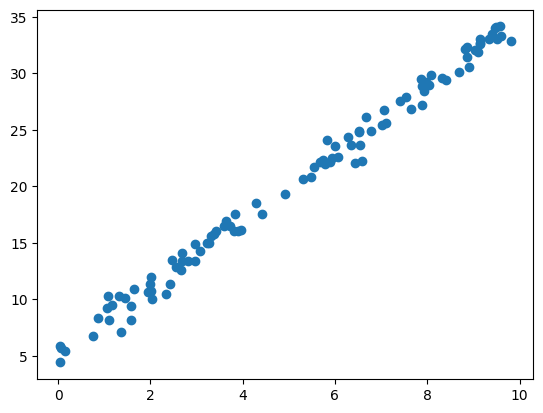

In [2]:
# Generate synthetic data
torch.manual_seed(42)
X = torch.rand(100, 1) * 10  # 100 data points between 0 and 10
y = 3 * X + 5 + torch.randn(100, 1)  # Linear relationship with noise
plt.figure()
plt.scatter(X, y)

In [3]:
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(1, 1)
    
    def forward(self, x):
        return self.layer(x)
    
model = CustomModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [4]:
writer = SummaryWriter()

for i in range(100):
    pred = model(X)
    loss = criterion(pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    writer.add_scalar("train/loss", loss.item(), i)
    if i % 10 == 0:
        print(f"loss = {loss}")

writer.close()

loss = 467.6552429199219
loss = 10.085208892822266
loss = 6.37672233581543
loss = 6.188498020172119
loss = 6.032050609588623
loss = 5.8802313804626465
loss = 5.7327094078063965
loss = 5.589354991912842
loss = 5.4500579833984375
loss = 5.314698696136475


In [5]:
!tensorboard --logdir=runs

TensorFlow installation not found - running with reduced feature set.
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.18.0 at http://localhost:6006/ (Press CTRL+C to quit)
